In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
cc_data = '/content/credit_card_dataset.csv'

In [3]:
credit_card_data = pd.read_csv(cc_data)

Checking the dimensions of DataFrame

In [4]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93115,64257,-0.290474,1.582577,1.601790,2.547201,0.558452,0.343509,0.635602,0.012547,-1.576857,...,-0.237715,-0.532520,-0.123456,-0.452534,-0.259658,0.007326,0.388331,0.196790,0.90,0.0
93116,64258,1.256199,-0.015231,-1.469229,-0.093911,2.128520,3.459439,-0.660356,0.902599,0.461278,...,-0.234142,-0.584964,-0.130329,0.941959,0.706134,0.426656,0.003528,0.036224,12.31,0.0
93117,64258,1.014934,1.030917,-1.691832,1.316938,1.696661,0.529454,0.334103,0.364072,-0.712010,...,-0.039147,0.095222,-0.094135,-1.345571,0.509644,-0.182865,0.106718,0.072131,2.69,0.0
93118,64259,-1.081082,-0.644092,1.031406,-1.974550,1.621929,-0.868214,0.310676,-0.227899,-1.466089,...,0.220677,0.379904,-0.404961,-0.908840,0.891638,-0.130281,-0.203856,-0.178396,15.00,0.0


DIMENSIONS OF THE DATASET


In [5]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93115,64257,-0.290474,1.582577,1.601790,2.547201,0.558452,0.343509,0.635602,0.012547,-1.576857,...,-0.237715,-0.532520,-0.123456,-0.452534,-0.259658,0.007326,0.388331,0.196790,0.90,0.0
93116,64258,1.256199,-0.015231,-1.469229,-0.093911,2.128520,3.459439,-0.660356,0.902599,0.461278,...,-0.234142,-0.584964,-0.130329,0.941959,0.706134,0.426656,0.003528,0.036224,12.31,0.0
93117,64258,1.014934,1.030917,-1.691832,1.316938,1.696661,0.529454,0.334103,0.364072,-0.712010,...,-0.039147,0.095222,-0.094135,-1.345571,0.509644,-0.182865,0.106718,0.072131,2.69,0.0
93118,64259,-1.081082,-0.644092,1.031406,-1.974550,1.621929,-0.868214,0.310676,-0.227899,-1.466089,...,0.220677,0.379904,-0.404961,-0.908840,0.891638,-0.130281,-0.203856,-0.178396,15.00,0.0
93119,64259,0.448927,-1.914826,-0.292417,0.014388,-1.470117,-1.057563,0.478084,-0.486407,-0.995607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA PREPARATION

In [7]:
credit_card_data['Class'].value_counts()

,count
Class,
0.0,92906
1.0,213


The given dataset is
 unbalanced:
0 = Legit Transactions,
1 = Fraud Transactions

In [8]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(92906, 31)
(213, 31)


In [10]:
legit.Amount.describe()

,Amount
count,92906.000000
mean,98.979545
std,268.280528
min,0.000000
25%,7.610000
50%,26.970000
75%,89.950000
max,19656.530000


In [11]:
fraud.Amount.describe()

,Amount
count,213.000000
mean,108.459202
std,242.266755
min,0.000000
25%,1.000000
50%,7.610000
75%,99.990000
max,1809.680000


In [12]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,40717.099143,-0.249285,-0.050639,0.696774,0.151937,-0.270351,0.098517,-0.094157,0.049230,-0.029937,...,0.042543,-0.031747,-0.107356,-0.037365,0.009882,0.131976,0.026744,0.000336,0.002239,98.979545
1.0,35331.652582,-6.244735,4.292771,-8.210525,5.013849,-4.514902,-1.875183,-6.513625,2.843951,-2.980089,...,0.370283,0.739456,-0.128955,-0.231495,-0.104869,0.212955,0.096711,0.531091,0.042891,108.459202


Building a distribution of normal and fraud transactions


In [13]:
new_dataset = pd.concat([legit, fraud],axis=0)

In [14]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [15]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88876,62330,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,0.113219,...,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,1.00,1.0
88897,62341,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10,1.0
89190,62467,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1.0
91671,63578,-0.639191,-0.085595,1.265452,1.401166,-0.260542,1.009795,1.301999,-0.135258,-0.431521,...,0.340331,0.760170,0.353377,-0.778893,-0.070681,-0.033355,-0.061962,-0.062687,290.18,1.0
92777,64093,-6.133987,2.941499,-5.593986,3.258845,-5.315512,-0.637328,-4.476488,1.695994,-1.606743,...,0.868340,0.793736,0.217347,-0.021985,0.145882,0.665088,-1.684186,0.310195,294.90,1.0


In [16]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,92906
1.0,213


In [17]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,40717.099143,-0.249285,-0.050639,0.696774,0.151937,-0.270351,0.098517,-0.094157,0.049230,-0.029937,...,0.042543,-0.031747,-0.107356,-0.037365,0.009882,0.131976,0.026744,0.000336,0.002239,98.979545
1.0,35331.652582,-6.244735,4.292771,-8.210525,5.013849,-4.514902,-1.875183,-6.513625,2.843951,-2.980089,...,0.370283,0.739456,-0.128955,-0.231495,-0.104869,0.212955,0.096711,0.531091,0.042891,108.459202


In [18]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [19]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88876,62330,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,0.113219,...,-0.067712,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,1.00
88897,62341,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,-0.286043,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10
89190,62467,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,-1.562162,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16
91671,63578,-0.639191,-0.085595,1.265452,1.401166,-0.260542,1.009795,1.301999,-0.135258,-0.431521,...,0.861307,0.340331,0.760170,0.353377,-0.778893,-0.070681,-0.033355,-0.061962,-0.062687,290.18


In [20]:
Y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
88876,1.0
88897,1.0
89190,1.0
91671,1.0


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, stratify=Y,test_size=0.2, random_state=2)

Model Training

In [22]:
#Building the Regression Logistic model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [23]:
model.pred = model.predict(X_test)

Non Fraud %  99.77
Fraud %     0.23


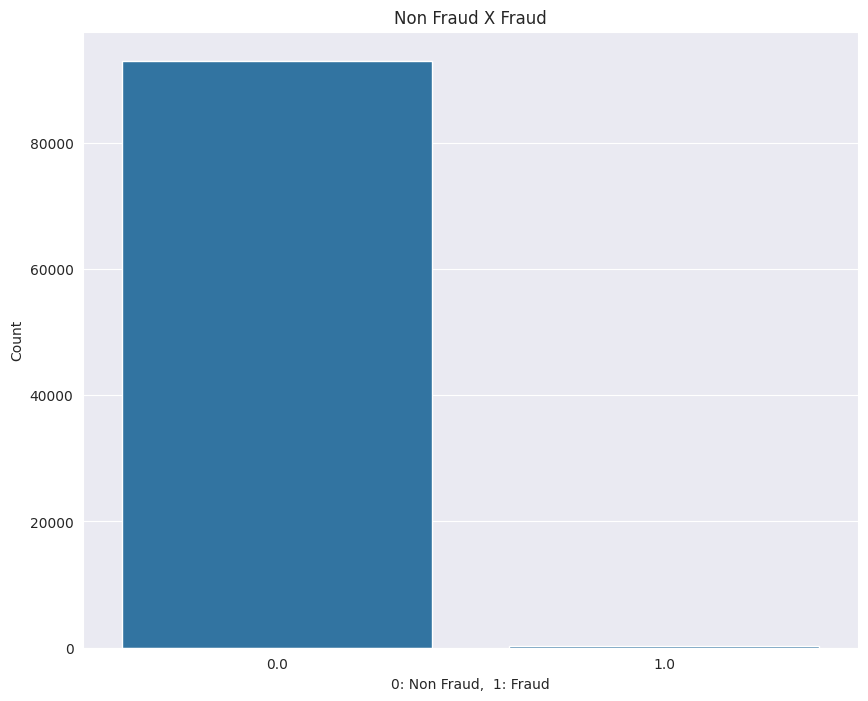

In [24]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=credit_card_data['Class'].value_counts().index,y=credit_card_data['Class'].value_counts())
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(credit_card_data['Class'].value_counts()[0]/len(credit_card_data)*100,2))
print ('Fraud %    ',round(credit_card_data['Class'].value_counts()[1]/len(credit_card_data)*100,2));

Model Evaluation

In [25]:
#Checking the Accuracy Score

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Accuracy on Training data =', training_data_accuracy)

Accuracy on Training data = 0.9986710517484395


In [27]:
#Checking the Accuracy on Test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy on Test data =', test_data_accuracy)

Accuracy on Test data = 0.9986039518900344
